In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('breast_cancer.csv')

In [3]:
df.head()

,Unnamed: 0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [4]:
df1 = df.drop(['Unnamed: 0','target_names'],axis=1)

malignant 212
benign 357


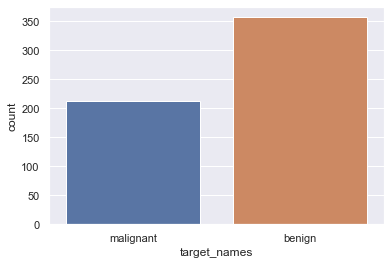

In [5]:
ax = sns.countplot(df['target_names'],label='count')
B,M = df['target_names'].value_counts()
print('malignant',M)
print('benign',B)

In [6]:
x = df1.drop(['target'],axis=1)
y = df1.target

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.23,random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
clf = Sequential()
clf.add(Dense( input_dim=30, output_dim=16, kernel_initializer="uniform",activation='relu'))
clf.add(Dense( output_dim=16, kernel_initializer="uniform",activation='relu'))
clf.add(Dense( output_dim=1, kernel_initializer="uniform",activation='sigmoid'))


C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, kernel_initializer="uniform", activation="relu", units=16)`
  
C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=16)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=1)`
  after removing the cwd from sys.path.


In [12]:
clf.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
clf.fit(x_train,y_train,batch_size=100,nb_epoch=150)

C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
438/438 [==============================] - 2s 5ms/step - loss: 0.6927 - accuracy: 0.6507
Epoch 2/150
438/438 [==============================] - 0s 82us/step - loss: 0.6913 - accuracy: 0.6689
Epoch 3/150
438/438 [==============================] - 0s 83us/step - loss: 0.6892 - accuracy: 0.7420
Epoch 4/150
438/438 [==============================] - 0s 69us/step - loss: 0.6860 - accuracy: 0.8219
Epoch 5/150
438/438 [==============================] - 0s 76us/step - loss: 0.6810 - accuracy: 0.9087
Epoch 6/150
438/438 [==============================] - 0s 79us/step - loss: 0.6735 - accuracy: 0.9224
Epoch 7/150
438/438 [==============================] - 0s 78us/step - loss: 0.6624 - accuracy: 0.9269
Epoch 8/150
438/438 [==============================] - 0s 61us/step - loss: 0.6471 - accuracy: 0.9315
Epoch 9/150
438/438 [==============================] - 0s 107us/step - loss: 0.6271 - accuracy: 0.9361
Epoch 10/150
438/438 [==============================] - 0s 62us/step - loss: 0.600

438/438 [==============================] - 0s 91us/step - loss: 0.0493 - accuracy: 0.9863
Epoch 81/150
438/438 [==============================] - 0s 113us/step - loss: 0.0490 - accuracy: 0.9863
Epoch 82/150
438/438 [==============================] - 0s 74us/step - loss: 0.0485 - accuracy: 0.9863
Epoch 83/150
438/438 [==============================] - 0s 69us/step - loss: 0.0481 - accuracy: 0.9863
Epoch 84/150
438/438 [==============================] - 0s 59us/step - loss: 0.0477 - accuracy: 0.9863
Epoch 85/150
438/438 [==============================] - 0s 59us/step - loss: 0.0473 - accuracy: 0.9863
Epoch 86/150
438/438 [==============================] - 0s 56us/step - loss: 0.0469 - accuracy: 0.9863
Epoch 87/150
438/438 [==============================] - 0s 48us/step - loss: 0.0465 - accuracy: 0.9886
Epoch 88/150
438/438 [==============================] - 0s 75us/step - loss: 0.0462 - accuracy: 0.9909
Epoch 89/150
438/438 [==============================] - 0s 83us/step - loss: 0.0458 -

In [46]:
y_prd = clf.predict(x_test)
y_prd = (y_prd > 0.5)
y_prd

array([[ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_prd)

In [16]:
cm

array([[48,  2],
       [ 0, 81]], dtype=int64)

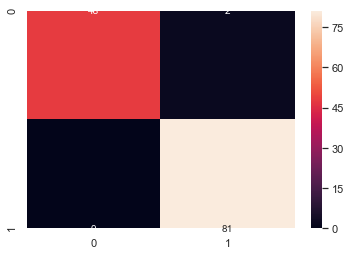

In [17]:
sns.heatmap(cm, annot=True)

In [18]:
df2 = pd.read_csv('iris.csv')

In [19]:
df2

,Unnamed: 0,5.1,3.5,1.4,0.2,Iris-setosa
0,0,4.9,3.0,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.3,0.2,Iris-setosa
2,2,4.6,3.1,1.5,0.2,Iris-setosa
3,3,5.0,3.6,1.4,0.2,Iris-setosa
4,4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
144,144,6.7,3.0,5.2,2.3,Iris-virginica
145,145,6.3,2.5,5.0,1.9,Iris-virginica
146,146,6.5,3.0,5.2,2.0,Iris-virginica
147,147,6.2,3.4,5.4,2.3,Iris-virginica


In [20]:
df2 = df2.drop(['Unnamed: 0'],axis=1)

In [21]:
from keras.optimizers import Adam
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


In [22]:
x1 = df2.drop(['Iris-setosa'],axis=1)
y1 = df2.iloc[:,-1]

In [23]:
x1

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4
...,...,...,...,...
144,6.7,3.0,5.2,2.3
145,6.3,2.5,5.0,1.9
146,6.5,3.0,5.2,2.0
147,6.2,3.4,5.4,2.3


In [24]:
y1.shape

(149,)

In [25]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y2 = lb.fit_transform(y1)
y1 = pd.get_dummies(y2).values


In [26]:
y1.shape

(149, 3)

In [27]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.1,random_state=42)

In [28]:
model = Sequential()
model.add(Dense(4,input_shape=(4,),activation='relu'))
model.add(Dense(3,activation='softmax'))


In [29]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(x1_train,y1_train,batch_size=10,nb_epoch=100)

C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
134/134 [==============================] - 1s 10ms/step - loss: 1.4220 - accuracy: 0.3507
Epoch 2/100
134/134 [==============================] - 0s 355us/step - loss: 1.3222 - accuracy: 0.3507
Epoch 3/100
134/134 [==============================] - 0s 381us/step - loss: 1.2469 - accuracy: 0.3507
Epoch 4/100
134/134 [==============================] - 0s 340us/step - loss: 1.1945 - accuracy: 0.3507
Epoch 5/100
134/134 [==============================] - 0s 358us/step - loss: 1.1569 - accuracy: 0.3433
Epoch 6/100
134/134 [==============================] - 0s 340us/step - loss: 1.1171 - accuracy: 0.3433
Epoch 7/100
134/134 [==============================] - 0s 351us/step - loss: 1.0853 - accuracy: 0.3284
Epoch 8/100
134/134 [==============================] - ETA: 0s - loss: 0.9528 - accuracy: 0.50 - 0s 411us/step - loss: 1.0525 - accuracy: 0.3358
Epoch 9/100
134/134 [==============================] - 0s 402us/step - loss: 1.0218 - accuracy: 0.3507
Epoch 10/100
134/134 [==========

134/134 [==============================] - 0s 347us/step - loss: 0.3331 - accuracy: 0.9627
Epoch 79/100
134/134 [==============================] - 0s 306us/step - loss: 0.3299 - accuracy: 0.9776
Epoch 80/100
134/134 [==============================] - 0s 306us/step - loss: 0.3253 - accuracy: 0.9627
Epoch 81/100
134/134 [==============================] - 0s 276us/step - loss: 0.3223 - accuracy: 0.9627
Epoch 82/100
134/134 [==============================] - 0s 291us/step - loss: 0.3182 - accuracy: 0.9627
Epoch 83/100
134/134 [==============================] - 0s 304us/step - loss: 0.3152 - accuracy: 0.9701
Epoch 84/100
134/134 [==============================] - 0s 421us/step - loss: 0.3115 - accuracy: 0.9776
Epoch 85/100
134/134 [==============================] - 0s 343us/step - loss: 0.3084 - accuracy: 0.9701
Epoch 86/100
134/134 [==============================] - 0s 258us/step - loss: 0.3051 - accuracy: 0.9627
Epoch 87/100
134/134 [==============================] - 0s 291us/step - loss:

In [31]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

In [32]:
def clssf():
    clf = Sequential()
    clf.add(Dense( input_dim=30, output_dim=16, kernel_initializer="uniform",activation='relu'))
    clf.add(Dense( output_dim=16, kernel_initializer="uniform",activation='relu'))
    clf.add(Dense( output_dim=1, kernel_initializer="uniform",activation='sigmoid'))
    clf.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
    return clf
clf = KerasClassifier(build_fn=clssf,batch_size=100,epochs=100)
accur = cross_val_score(estimator= clf, X= x_train,y=y_train,cv=10,n_jobs=-1)


In [33]:
mean = accur.mean()
mean

0.9749471485614777

In [34]:
accur

array([1.        , 0.97727275, 0.97727275, 0.93181819, 0.95454544,
       1.        , 1.        , 0.93181819, 1.        , 0.97674417])

In [35]:
accur.std()

0.025809052657714743

In [36]:
from keras.layers import Dropout

In [37]:
clf = Sequential()
clf.add(Dense( input_dim=30, output_dim=16, kernel_initializer="uniform",activation='relu'))
clf.add(Dropout(p=1.0))
clf.add(Dense( output_dim=16, kernel_initializer="uniform",activation='relu'))
clf.add(Dropout(p=1.0))
clf.add(Dense( output_dim=1, kernel_initializer="uniform",activation='sigmoid'))

C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=30, kernel_initializer="uniform", activation="relu", units=16)`
  
C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=16)`
  after removing the cwd from sys.path.
C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  """
C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sig

In [38]:
clf.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
clf.fit(x_train,y_train,batch_size=100,nb_epoch=150)

C:\Users\ROHIT\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
438/438 [==============================] - 2s 5ms/step - loss: 0.6928 - accuracy: 0.6301
Epoch 2/150
438/438 [==============================] - 0s 73us/step - loss: 0.6911 - accuracy: 0.6301
Epoch 3/150
438/438 [==============================] - 0s 73us/step - loss: 0.6888 - accuracy: 0.6301
Epoch 4/150
438/438 [==============================] - 0s 74us/step - loss: 0.6852 - accuracy: 0.6301
Epoch 5/150
438/438 [==============================] - 0s 116us/step - loss: 0.6793 - accuracy: 0.6393
Epoch 6/150
438/438 [==============================] - 0s 467us/step - loss: 0.6704 - accuracy: 0.7215
Epoch 7/150
438/438 [==============================] - 0s 119us/step - loss: 0.6580 - accuracy: 0.8402
Epoch 8/150
438/438 [==============================] - 0s 73us/step - loss: 0.6402 - accuracy: 0.9110
Epoch 9/150
438/438 [==============================] - 0s 80us/step - loss: 0.6167 - accuracy: 0.9338
Epoch 10/150
438/438 [==============================] - 0s 87us/step - loss: 0.5

438/438 [==============================] - 0s 89us/step - loss: 0.0516 - accuracy: 0.9863
Epoch 81/150
438/438 [==============================] - 0s 80us/step - loss: 0.0511 - accuracy: 0.9863
Epoch 82/150
438/438 [==============================] - 0s 64us/step - loss: 0.0507 - accuracy: 0.9863
Epoch 83/150
438/438 [==============================] - 0s 54us/step - loss: 0.0503 - accuracy: 0.9863
Epoch 84/150
438/438 [==============================] - 0s 90us/step - loss: 0.0500 - accuracy: 0.9863
Epoch 85/150
438/438 [==============================] - 0s 53us/step - loss: 0.0494 - accuracy: 0.9863
Epoch 86/150
438/438 [==============================] - 0s 78us/step - loss: 0.0488 - accuracy: 0.9863
Epoch 87/150
438/438 [==============================] - 0s 65us/step - loss: 0.0483 - accuracy: 0.9863
Epoch 88/150
438/438 [==============================] - 0s 49us/step - loss: 0.0477 - accuracy: 0.9863
Epoch 89/150
438/438 [==============================] - 0s 61us/step - loss: 0.0472 - 

In [40]:
y_prd1 = clf.predict(x_test)
y_prd1 = (y_prd1 > 0.5)

In [41]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test,y_prd1)

In [42]:
cm1

array([[49,  1],
       [ 0, 81]], dtype=int64)

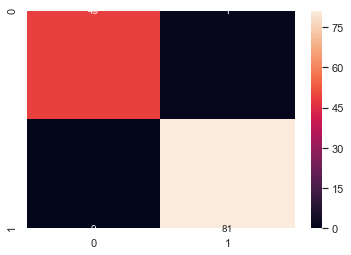

In [43]:
sns.heatmap(cm1, annot=True)

def clssf(optimizer='adam'):
    clf = Sequential()
    clf.add(Dense( input_dim=30, output_dim=16, kernel_initializer="uniform",activation='relu'))
    clf.add(Dense( output_dim=16, kernel_initializer="uniform",activation='relu'))
    clf.add(Dense( output_dim=1, kernel_initializer="uniform",activation='sigmoid'))
    clf.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'])
    return clf
clf = KerasClassifier(build_fn=clssf)
par = {'batch_size':[100,150],'epochs':[100,200],'optimizer':['adam','rmsprop']}
from sklearn.model_selection import GridSearchCV
grd = GridSearchCV(estimator=clf,param_grid=par,scoring='accuracy',cv=10)
grd_srch = grd.fit(x_train,y_train)
bst_prms = grd_srch.best_params_
best_acc = grd_srch.best_score_

In [44]:
bst_prms

NameError: name 'bst_prms' is not defined

In [ ]:
best_acc